<a href="https://colab.research.google.com/github/RadhikaRM/BikeShareDemandprediction/blob/main/Bike_Sharing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
#importing the required modules and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## *Bringing in the data*

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading the dataset
bd_df=pd.read_csv("/content/drive/MyDrive/Copy of SeoulBikeData.csv", encoding='ISO-8859-1')
df_copy=bd_df.copy()

In [5]:
#displaying the first 5 rows in the dataset
bd_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
#inspecting the datatypes of the columns
bd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec


* There are 8760 rows and 14 columns in the given data.
* None of the columns have missing values.
* Except for Date,the other columns have the correct datatypes.


In [7]:
#displaying the names of columns in the dataframe
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
#viewing the statistical summary of the data
bd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [9]:
#Checking for null values
bd_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
#Checking for duplicate entries
bd_df[bd_df.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [12]:
#Converting the datatype of Date column to datatime
 
bd_df['Date'] = pd.to_datetime(bd_df['Date'], format='%d/%m/%Y')

#Extracting Date,Month,Weekday and Year from the date column
bd_df['Day']=bd_df['Date'].dt.day
bd_df['Month']=bd_df['Date'].dt.month
bd_df['Weekday']=bd_df['Date'].dt.day_name()
bd_df['Year']=bd_df['Date'].dt.year

In [13]:
#Displaying the unique values in the categorical columns
categorical_columns=['Seasons','Holiday', 'Functioning Day','Weekday']

for col in categorical_columns:
  print(f'The unique values in the column {col} are {bd_df[col].unique()}')

The unique values in the column Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
The unique values in the column Holiday are ['No Holiday' 'Holiday']
The unique values in the column Functioning Day are ['Yes' 'No']
The unique values in the column Weekday are ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


In [14]:
#Creating a list of numerical columns
numerical_columns=list(bd_df.select_dtypes(exclude=['object','datetime64[ns]']).columns)

In [15]:
print(numerical_columns)

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'Month', 'Year']


# ***Univariate Analysis***

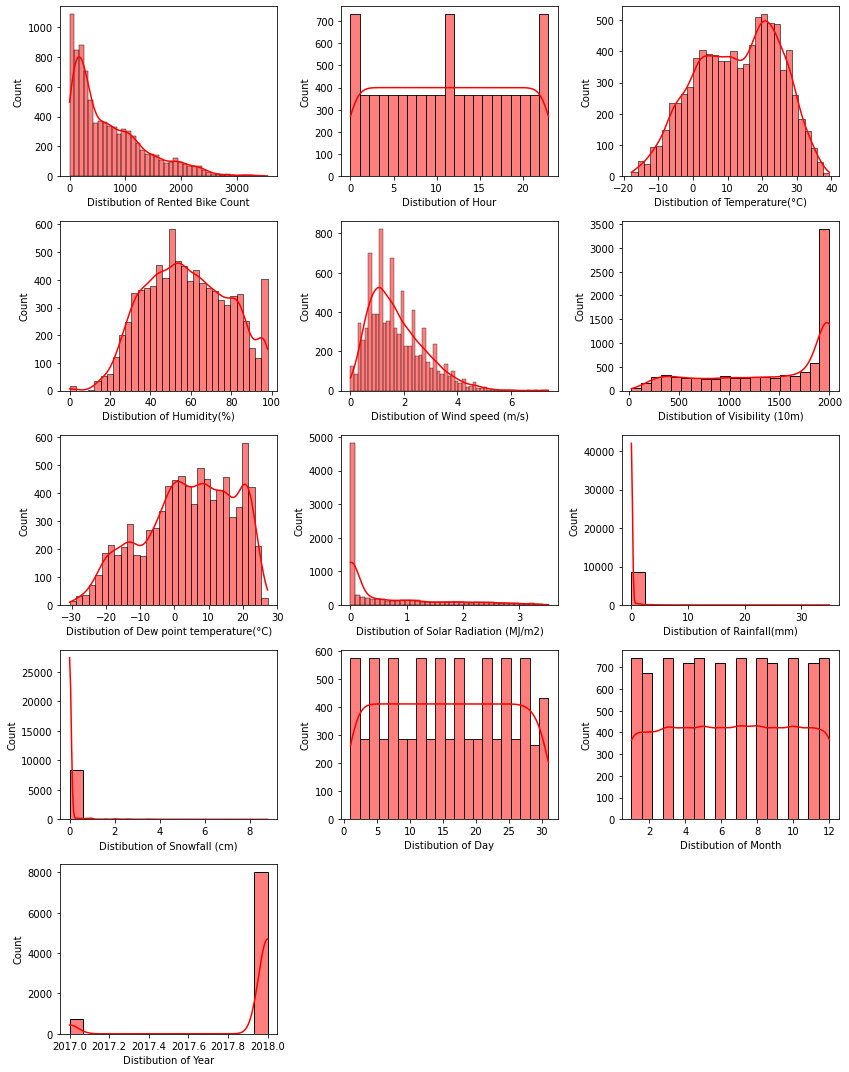

In [16]:
#Plotting the distibution of numerical columns 

fig = plt.figure(figsize=(12,15))
c=1
for i in numerical_columns :
    plt.subplot(5,3, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.histplot(x=bd_df[i],kde=True,line_kws={'lw': 1.5},color='red')
    c = c + 1
plt.tight_layout()


* Distribution of Temperature,Humidity,Dew point temperature are almost normal.
* Wind speed,Solar Radiation,Rainfall,Snowfall-positively skewed
* Visibility is negatively skewed


In [17]:
#Calculating skewness for the dependent variable
bd_df['Rented Bike Count'].agg(['skew', 'kurtosis']).transpose()

skew        1.153428
kurtosis    0.853387
Name: Rented Bike Count, dtype: float64

The target is heavily skewed toward the right.To reduce the positive skewness of the data ,let's try applying sqrt transformation

In [18]:
df_copy['sqrt_count']=np.sqrt(bd_df['Rented Bike Count'])